In [1]:
import tweepy
import json
import pandas as pd
import matplotlib.pyplot as plt

from config import consumer_key, consumer_secret, access_token, access_token_secret

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Array of Trains
delayed_trains = {}
    
# Target User
target_user = "SubwayStats"

# Loop through 50 pages of tweets
for p in range(1, 51):

    # Loop through all tweets
    for tweet in api.user_timeline(target_user, page=p):
        
        # Loop through hashtags to extract the train names
        for hashtag in tweet["entities"]["hashtags"]:
            
            # Get train name from lowercase hashtag name
            train_name = hashtag['text'].lower()
            
            # Skip train names that don't contain 'train'
            if 'train' not in train_name:
                continue
            
            # If train is new, add it the list...
            if train_name not in delayed_trains:
                delayed_trains[train_name] = 1

            # If it already exists add 1 to its count
            else:    
                delayed_trains[train_name] += 1

In [4]:
# Print the Train Delay counts
print(delayed_trains)

# Convert Train Delay object into a series
delayed_trains_pd = pd.Series(delayed_trains)

# Preview the results
delayed_trains_pd

{'jtrain': 40, 'ztrain': 40, 'ntrain': 157, 'qtrain': 157, 'rtrain': 157, 'wtrain': 157, '7train': 33, '4train': 155, '5train': 155, '6train': 155, 'btrain': 195, 'dtrain': 195, 'ftrain': 195, 'mtrain': 195, 'gtrain': 27, 'atrain': 131, 'ctrain': 131, 'etrain': 131, 'ltrain': 48, 'sirtrain': 35, '1train': 156, '2train': 156, '3train': 156, 'strain': 23}


jtrain       40
ztrain       40
ntrain      157
qtrain      157
rtrain      157
wtrain      157
7train       33
4train      155
5train      155
6train      155
btrain      195
dtrain      195
ftrain      195
mtrain      195
gtrain       27
atrain      131
ctrain      131
etrain      131
ltrain       48
sirtrain     35
1train      156
2train      156
3train      156
strain       23
dtype: int64

Text(0.5,1,'Number of Train Delays According to 1000 Subway Status Tweets...')

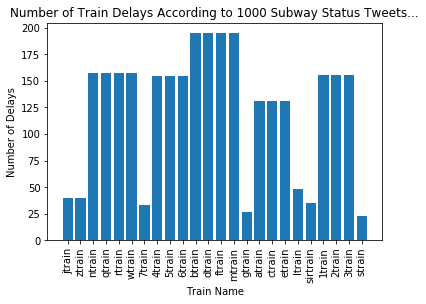

In [5]:
# Create a plot of train name vs number of delays
plt.bar(delayed_trains_pd.index, delayed_trains_pd.values)
plt.xticks(delayed_trains_pd.index, rotation=90)
plt.ylabel("Number of Delays")
plt.xlabel("Train Name")
plt.title("Number of Train Delays According to 1000 Subway Status Tweets...")